In [16]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.colors
import pandas as pd
import numpy as np

In [17]:
dataset_names = {
    "german" : "German Credit",
    "compas" : "COMPAS",
    "adult" : "Adult",
    "acsincome" : "ACSIncome",
    "taiwan" : "Taiwan Credit",
}
methods_color = {
    "LGBMClassifier" : "#ffd92f",
    "FairGBMClassifier" : "#fc8d62",
    "FairGBMClassifier_eod" : "#fc8d62",
    "MinMaxFair" : "#a6d854",
    "MinMaxFair_tpr" : "#a6d854",
    "M2FGB_grad" : "#8da0cb",
    "M2FGB_grad_tpr" : "#8da0cb",
    "M2FGB_grad_pr" : "#8da0cb",
    #"M2FGB" : "#66c2a5",
    "MinimaxPareto" : "pink"
}
methods_names = {
    "LGBMClassifier" : "LGBM",
    "FairGBMClassifier" : "FairGBM",
    "FairGBMClassifier_eod" : "FairGBM (eod)",
    "M2FGB_grad" : "M²FGB",
    "M2FGB_grad_tpr" : "M²FGB (tpr)",
    "M2FGB_grad_pr" : "M²FGB (pr)",
    #"M2FGB" : "M²FGB opt.",
    "MinMaxFair" : "MinMaxFair",
    "MinMaxFair_tpr" : "MinMaxFair (tpr)",
    "MinimaxPareto" : "MMPF"
}

handles = [
    Line2D([0], [0], marker = "o", color = "w", label=value, markerfacecolor=methods_color[key], markersize=10) for key, value in methods_names.items() if "tpr" not in key and "pr" not in key and "eod" not in key
]

handles_tpr = [
    Line2D([0], [0], marker = "o", color = "w", label=value, markerfacecolor=methods_color[key], markersize=10) for key, value in methods_names.items() if "tpr" in key or "LGBM" in key or "eod" in key
]
handles_pr = [
    Line2D([0], [0], marker = "o", color = "w", label=value, markerfacecolor=methods_color[key], markersize=10) for key, value in methods_names.items() if "_pr" in key or "LGBM" in key
]

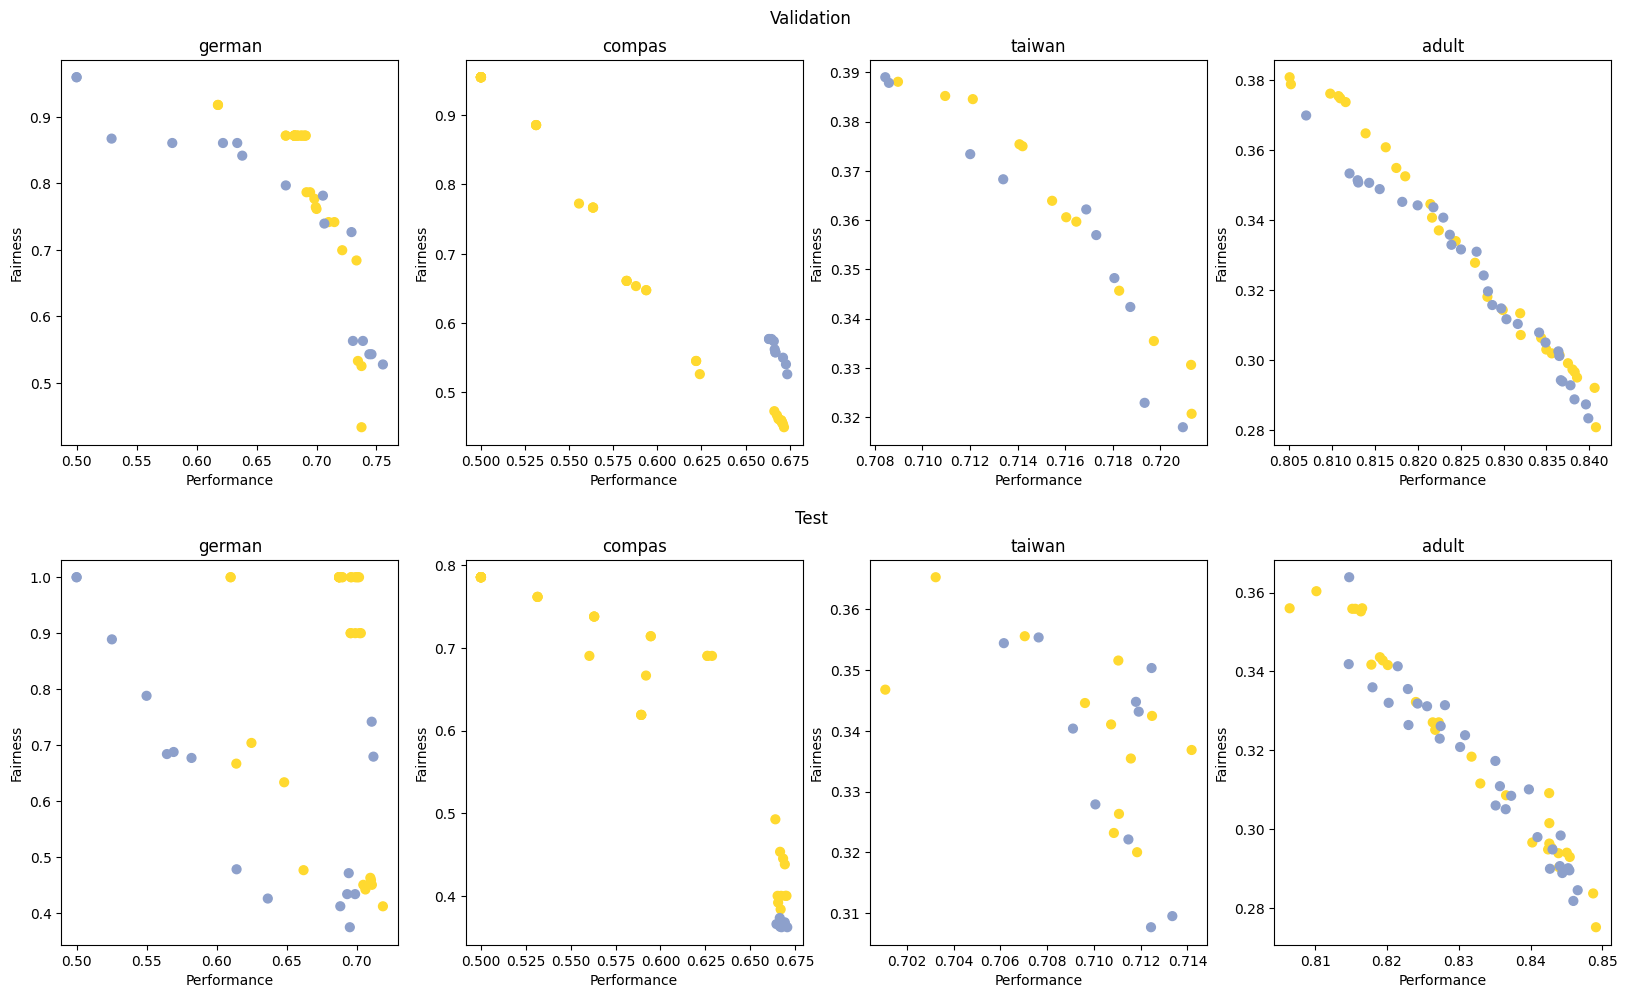

In [40]:
datasets = ["german", "compas", "taiwan", "adult"]
# make figure with two subfigures, one per row
figure = plt.figure(figsize=(20, 10))
subfigs = figure.subfigures(2, 1)
axs = [
    subfigs[0].subplots(1, len(datasets)),
    subfigs[1].subplots(1, len(datasets))
]
axs = np.array(axs)
subfigs[0].suptitle("Validation")
subfigs[1].suptitle("Test")


#fig, axs = plt.subplots(1, len(datasets), figsize=(20, 5))
for d, dataset in enumerate(datasets):
    for model in ["LGBMClassifier", "M2FGB_grad"]:

        df = pd.read_csv(f"../results_aaai_v2/experiment_8g_acc/{dataset}/{model}/trials.csv")
        df.columns = [c.replace("user_attrs_", "") for c in df.columns]

        # get non dominated points on val
        df["non_dominated"] = True

        for i, row in df.iterrows():
            for j, row2 in df.iterrows():
                if i == j:
                    continue
                if row["perf_val"] < row2["perf_val"] and row["fair_val"] < row2["fair_val"]:
                    df.at[i, "non_dominated"] = False
                    break
        df = df[df["non_dominated"]]
        axs[0,d].scatter(df.perf_val, df.fair_val, c = methods_color[model], label = methods_names[model], 
            s = [40 if dom else 10 for dom in df["non_dominated"]],
            alpha = [1 if dom else 0.5 for dom in df["non_dominated"]]
        )
            
        axs[1, d].scatter(df.perf_test, df.fair_test, c = methods_color[model], label = methods_names[model],
            s = [40 if dom else 10 for dom in df["non_dominated"]],
            alpha = [1 if dom else 0.2 for dom in df["non_dominated"]]
        )

        for i in range(2):
            axs[i, d].set_xlabel("Performance")
            axs[i, d].set_ylabel("Fairness")
            axs[i, d].set_title(dataset)
plt.show()

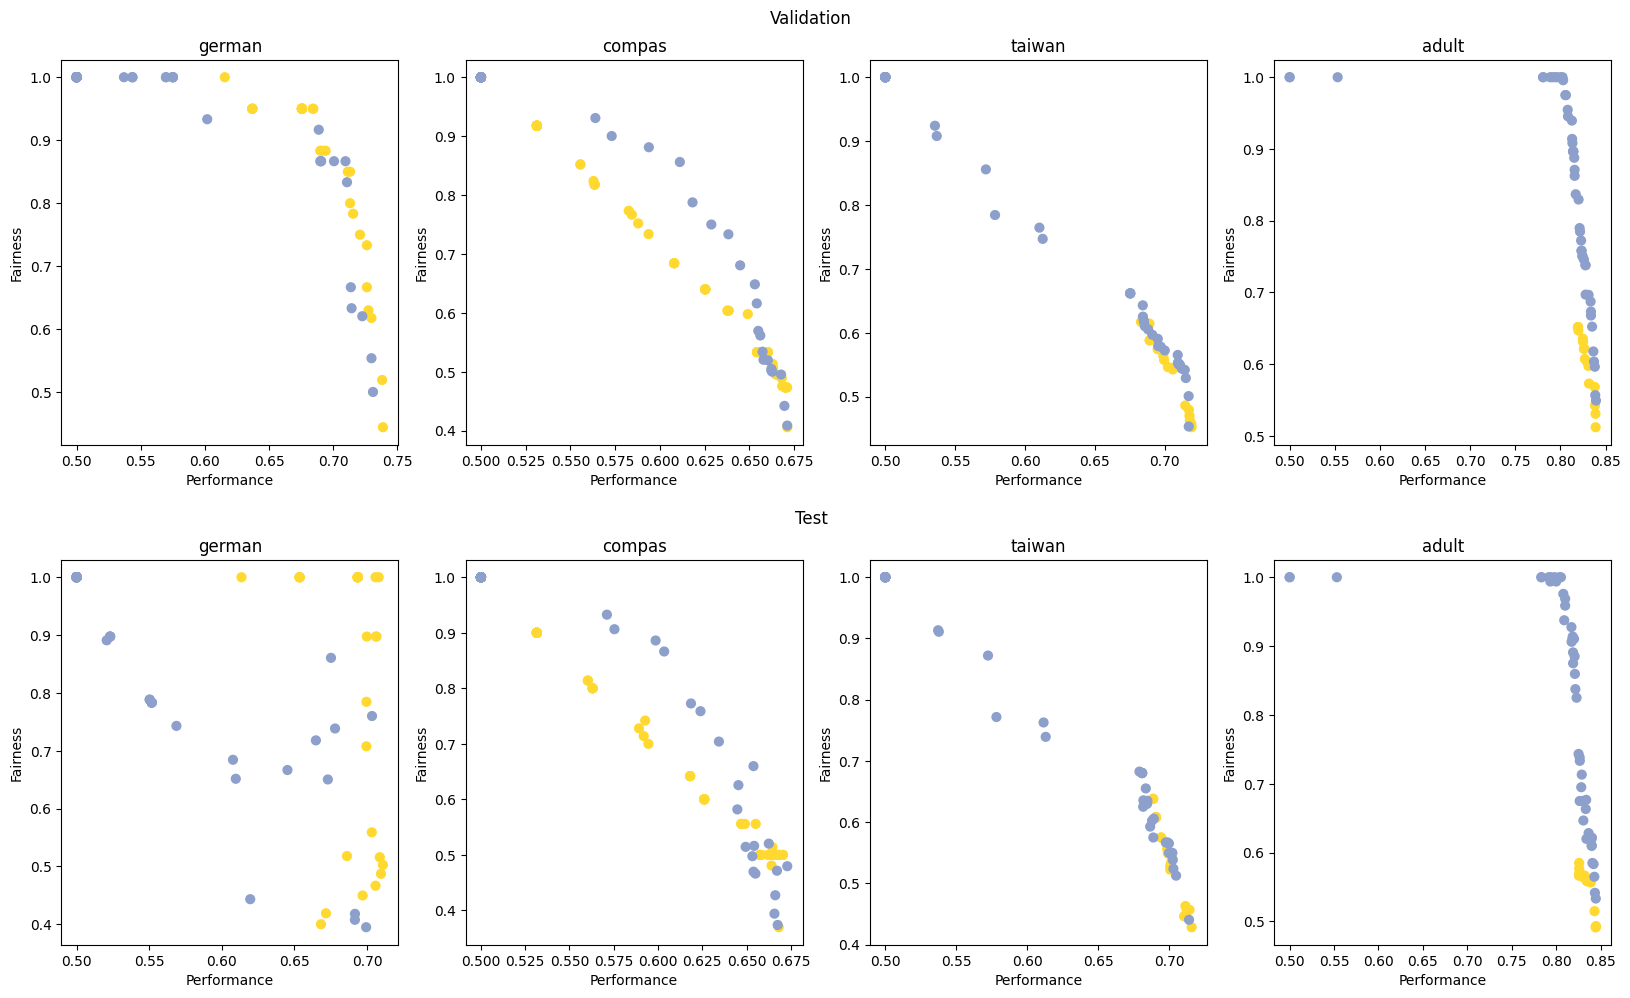

In [41]:
datasets = ["german", "compas", "taiwan", "adult"]
# make figure with two subfigures, one per row
figure = plt.figure(figsize=(20, 10))
subfigs = figure.subfigures(2, 1)
axs = [
    subfigs[0].subplots(1, len(datasets)),
    subfigs[1].subplots(1, len(datasets))
]
axs = np.array(axs)
subfigs[0].suptitle("Validation")
subfigs[1].suptitle("Test")


#fig, axs = plt.subplots(1, len(datasets), figsize=(20, 5))
for d, dataset in enumerate(datasets):
    for model in ["LGBMClassifier", "M2FGB_grad_tpr"]:

        df = pd.read_csv(f"../results_aaai_v2/experiment_8g_tpr/{dataset}/{model}/trials.csv")
        df.columns = [c.replace("user_attrs_", "") for c in df.columns]

        # get non dominated points on val
        df["non_dominated"] = True

        for i, row in df.iterrows():
            for j, row2 in df.iterrows():
                if i == j:
                    continue
                if row["perf_val"] < row2["perf_val"] and row["fair_val"] < row2["fair_val"]:
                    df.at[i, "non_dominated"] = False
                    break
        df = df[df["non_dominated"]]
        axs[0,d].scatter(df.perf_val, df.fair_val, c = methods_color[model], label = methods_names[model], 
            s = [40 if dom else 10 for dom in df["non_dominated"]],
            alpha = [1 if dom else 0.5 for dom in df["non_dominated"]]
        )
            
        axs[1, d].scatter(df.perf_test, df.fair_test, c = methods_color[model], label = methods_names[model],
            s = [40 if dom else 10 for dom in df["non_dominated"]],
            alpha = [1 if dom else 0.2 for dom in df["non_dominated"]]
        )

        for i in range(2):
            axs[i, d].set_xlabel("Performance")
            axs[i, d].set_ylabel("Fairness")
            axs[i, d].set_title(dataset)
plt.show()

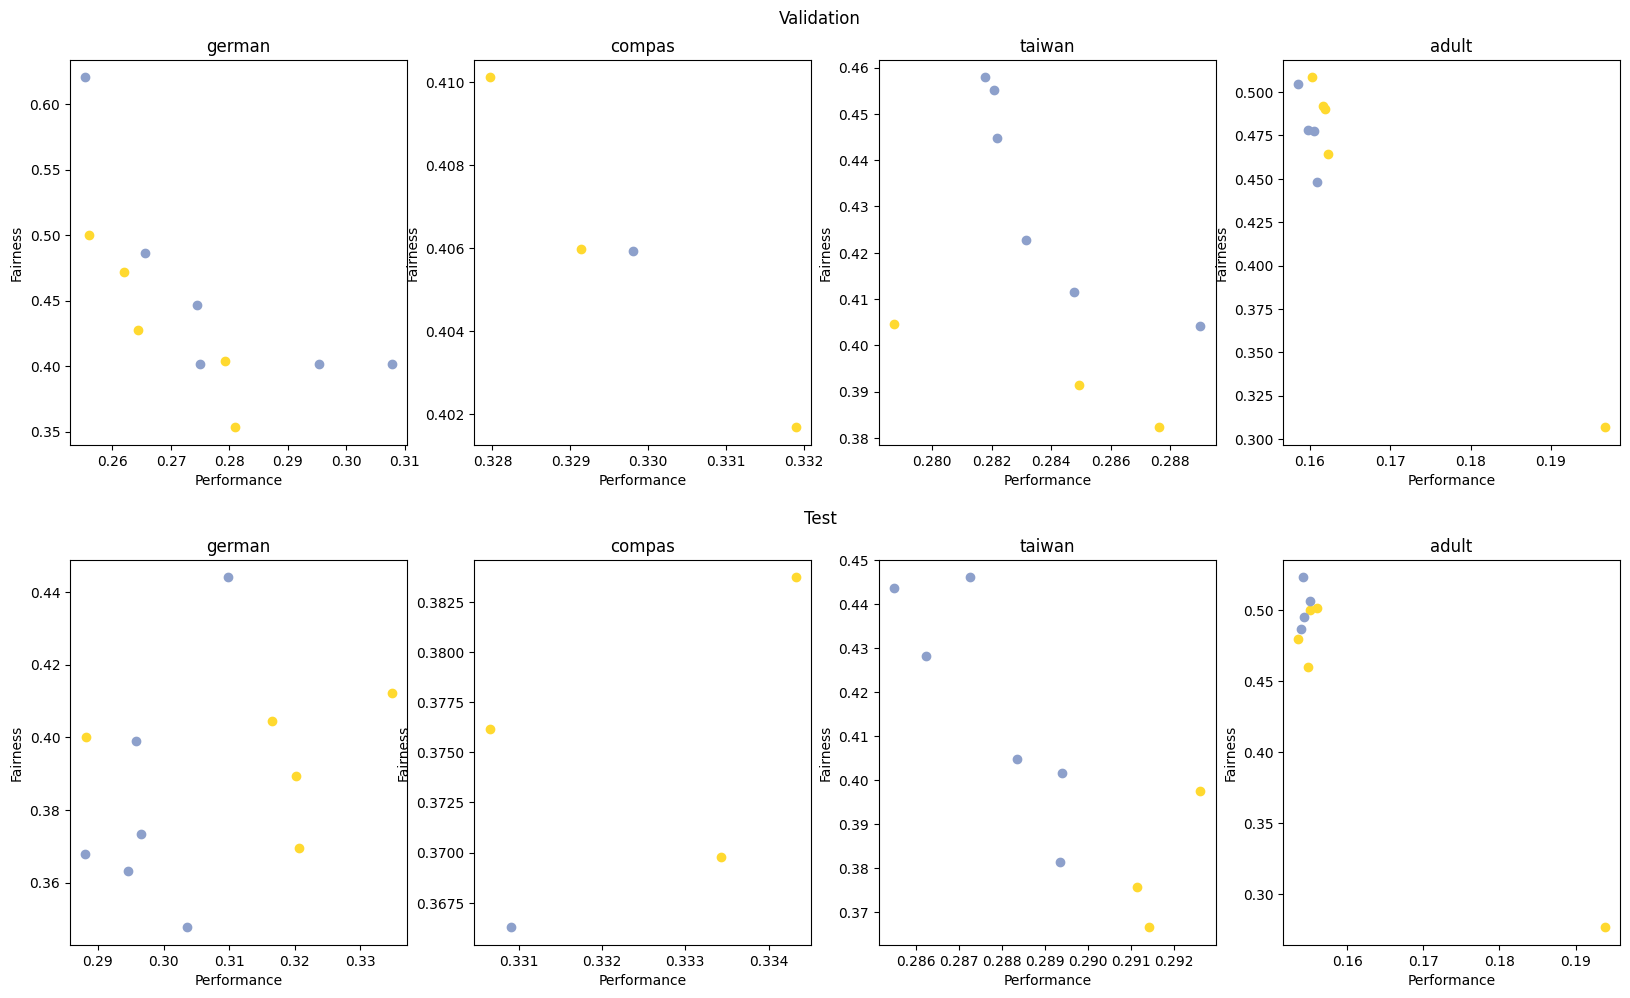

In [42]:
datasets = ["german", "compas", "taiwan", "adult"]
# make figure with two subfigures, one per row
figure = plt.figure(figsize=(20, 10))
subfigs = figure.subfigures(2, 1)
axs = [
    subfigs[0].subplots(1, len(datasets)),
    subfigs[1].subplots(1, len(datasets))
]
axs = np.array(axs)
subfigs[0].suptitle("Validation")
subfigs[1].suptitle("Test")


#fig, axs = plt.subplots(1, len(datasets), figsize=(20, 5))
for d, dataset in enumerate(datasets):
    for model in ["LGBMClassifier", "M2FGB_grad_tpr"]:

        df = pd.read_csv(f"../results_aaai_v2/experiment_8g_fnr/{dataset}/{model}/trials.csv")
        df.columns = [c.replace("user_attrs_", "") for c in df.columns]

        # get non dominated points on val
        df["non_dominated"] = True

        for i, row in df.iterrows():
            for j, row2 in df.iterrows():
                if i == j:
                    continue
                if row["perf_val"] < row2["perf_val"] and row["fair_val"] < row2["fair_val"]:
                    df.at[i, "non_dominated"] = False
                    break
        df = df[df["non_dominated"]]
        axs[0,d].scatter(1 - df.perf_val, 1 - df.fair_val, c = methods_color[model], label = methods_names[model])
        axs[1, d].scatter(1 - df.perf_test, 1 - df.fair_test, c = methods_color[model], label = methods_names[model])

        for i in range(2):
            axs[i, d].set_xlabel("Performance")
            axs[i, d].set_ylabel("Fairness")
            axs[i, d].set_title(dataset)
plt.show()